In [1]:
#! pip install cachetools
! pip install pennylane

In [2]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer

In [3]:
dev = qml.device("strawberryfields.fock", wires=1, cutoff_dim=10)

In [4]:
def layer(v):
    # Matrix multiplication of input layer
    qml.Rotation(v[0], wires=0)
    qml.Squeezing(v[1], 0.0, wires=0)
    qml.Rotation(v[2], wires=0)

    # Bias
    qml.Displacement(v[3], 0.0, wires=0)

    # Element-wise nonlinear transformation
    qml.Kerr(v[4], wires=0)

In [5]:
@qml.qnode(dev)
def quantum_neural_net(var, x):
    # Encode input x into quantum state
    qml.Displacement(x, 0.0, wires=0)

    # "layer" subcircuits
    for v in var:
        layer(v)

    return qml.expval(qml.X(0))

In [6]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In [7]:
def cost(var, features, labels):
    preds = [quantum_neural_net(var, x) for x in features]
    return square_loss(labels, preds)

In [8]:
##import csv
##data = open('ccfraud_10_features_1968.txt')
data = open('sine.txt')
##data = open('ccfraud_10_features_1968.csv')
#from numpy import genfromtxt
##data = genfromtxt('sine.txt', delimiter=',')
#my_data = genfrom('ccfraud_10_features_1968.csv', delimiter=',')

In [9]:
##data = np.loadtxt("ccfraud_10_features_1968.txt",dtype=np.int,delimiter=',')
##data = np.loadtxt("ccfraud_10_features_1968.txt",dtype=np.int,delimiter=',')
##X = np.array(data)
##Y = np.array(data[:, 1])
data = np.loadtxt("sine.txt")
##X = np.array(data[:, 0], requires_grad=False)
##Y = np.array(data[:, 1], requires_grad=False)

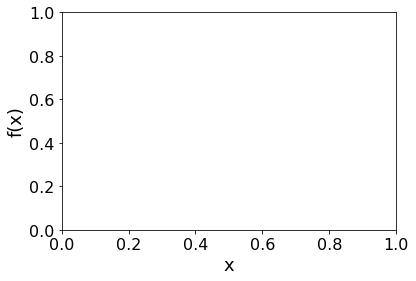

In [10]:
import matplotlib.pyplot as plt

plt.figure()
##plt.scatter(X, Y)
plt.xlabel("x", fontsize=18)
plt.ylabel("f(x)", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.show()

In [14]:
np.random.seed(0)
num_layers = 4
var_init = 0.05 * np.random.randn(num_layers, 5, requires_grad=True)
print(var_init)

[[ 0.08820262  0.02000786  0.0489369   0.11204466  0.0933779 ]
 [-0.04886389  0.04750442 -0.00756786 -0.00516094  0.02052993]
 [ 0.00720218  0.07271368  0.03805189  0.00608375  0.02219316]
 [ 0.01668372  0.07470395 -0.01025791  0.01565339 -0.04270479]]


In [13]:
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

var = var_init

data = np.loadtxt("sine.txt")
X = np.array(data[:, 0], requires_grad=False)
Y = np.array(data[:, 1], requires_grad=False)
(var, a, b), _cost = opt.step_and_cost(cost, var, X, Y)


## 回和數越大學習樂好但是算的曼
for it in range(5):
    ##(var, a, b), _cost = opt.step_and_cost(cost, var, X, Y)
    (var, a, b), _cost = opt.step_and_cost(cost, var, X, Y)
    print("Iter: {:5d} | Cost: {:0.7f} ".format(it, _cost))


Iter:     0 | Cost: 0.2103589 
Iter:     1 | Cost: 0.1591662 
Iter:     2 | Cost: 0.1547870 
Iter:     3 | Cost: 0.1703646 
Iter:     4 | Cost: 0.1728650 


In [12]:
x_pred = np.linspace(-1, 1, 50)
predictions = [quantum_neural_net(var, x_) for x_ in x_pred]

NameError: name 'var' is not defined

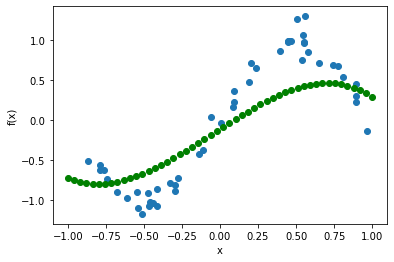

In [14]:
plt.figure()
plt.scatter(X, Y)
plt.scatter(x_pred, predictions, color="green")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

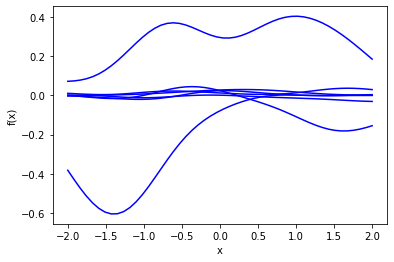

In [21]:
variance = 1.0

plt.figure()
x_pred = np.linspace(-2, 2, 50)
for i in range(7):
    rnd_var = variance * np.random.randn(num_layers, 7)
    predictions = [quantum_neural_net(rnd_var, x_) for x_ in x_pred]
    plt.plot(x_pred, predictions, color="blue")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()